first lest install y fiance and downliad our data 


In [186]:
!pip install yfinance --upgrade --quiet



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
import yfinance as yf
import pandas as pd

# Define U.S. stock symbols
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]

# Define date range
start_date = "2022-01-01"
end_date = "2025-08-24"

# Download data from yfinance
data = yf.download(symbols, start=start_date, end=end_date, interval="1d")['Close']

# Reset index to have 'timestamp' column
current_df = data.reset_index().melt(id_vars='Date', var_name='symbol', value_name='close')
current_df.rename(columns={'Date': 'timestamp'}, inplace=True)

# Make sure timestamp is datetime and set as index
current_df['timestamp'] = pd.to_datetime(current_df['timestamp'])
current_df.set_index('timestamp', inplace=True)

# Resample monthly for each symbol, taking last close of the month
monthly_df = current_df.groupby('symbol')['close'].resample('M').last().reset_index()

# Pivot to get monthly clean_df
clean_df = monthly_df.pivot(index='timestamp', columns='symbol', values='close')
clean_df.index.name = 'date'

print(clean_df.head())


C:\Users\Narya\AppData\Local\Temp\ipykernel_6708\4046393601.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start=start_date, end=end_date, interval="1d")['Close']
[*********************100%***********************]  5 of 5 completed

symbol            AAPL        AMZN       GOOGL        MSFT        TSLA
date                                                                  
2022-01-31  171.354828  149.573502  134.496887  301.462189  312.239990
2022-02-28  162.090378  153.563004  134.251846  290.244080  290.143341
2022-03-31  171.406296  162.997498  138.238449  299.491760  359.200012
2022-04-30  154.757431  124.281502  113.429222  269.582428  290.253326
2022-05-31  146.323746  120.209503  113.083794  264.709167  252.753326


In [188]:
bars.df

open    high     low   close       volume  \
symbol timestamp                                                                
AAPL   2022-01-03 05:00:00+00:00  177.83  182.88  177.71  182.01  112486091.0   
       2022-01-04 05:00:00+00:00  182.64  182.94  179.12  179.70  106090378.0   
       2022-01-05 05:00:00+00:00  179.61  180.17  174.64  174.92   95142198.0   
       2022-01-06 05:00:00+00:00  172.70  175.30  171.64  172.00  103899632.0   
       2022-01-07 05:00:00+00:00  172.89  174.14  171.03  172.17   94554334.0   
...                                  ...     ...     ...     ...          ...   
TSLA   2025-08-18 04:00:00+00:00  329.62  336.27  329.59  335.16   56956552.0   
       2025-08-19 04:00:00+00:00  335.79  340.55  327.85  329.31   75956002.0   
       2025-08-20 04:00:00+00:00  329.22  331.37  314.60  323.90   77481768.0   
       2025-08-21 04:00:00+00:00  322.08  324.90  318.68  320.11   55744445.0   
       2025-08-22 04:00:00+00:00  321.66  340.25  319.69  340.01   94016347.0   

                                  trade_count        vwap  
symbol timestamp                                           
AAPL   2022-01-03 05:00:00+00:00     772699.0  181.395005  
       2022-01-04 05:00:00+00:00     831898.0  180.596889  
       2022-01-05 05:00:00+00:00     848518.0  177.382297  
       2022-01-06 05:00:00+00:00     960344.0  173.031383  
       2022-01-07 05:00:00+00:00     715419.0  172.441994  
...                                       ...         ...  
TSLA   2025-08-18 04:00:00+00:00     778455.0  333.750920  
       2025-08-19 04:00:00+00:00    1023971.0  333.066409  
       2025-08-20 04:00:00+00:00    1123164.0  321.289171  
       2025-08-21 04:00:00+00:00     735268.0  321.654800  
       2025-08-22 04:00:00+00:00    1266653.0  335.139049  

[4565 rows x 7 columns]

In [189]:
# lets see our clean df 
clean_df

symbol,AAPL,AMZN,GOOGL,MSFT,TSLA
date,,,,,
2022-01-31,171.354828,149.573502,134.496887,301.462189,312.239990
2022-02-28,162.090378,153.563004,134.251846,290.244080,290.143341
2022-03-31,171.406296,162.997498,138.238449,299.491760,359.200012
2022-04-30,154.757431,124.281502,113.429222,269.582428,290.253326
2022-05-31,146.323746,120.209503,113.083794,264.709167,252.753326
2022-06-30,134.408676,106.209999,108.313408,250.065292,224.473328
2022-07-31,159.762634,134.949997,115.626549,273.345551,297.149994
2022-08-31,154.776764,126.769997,107.574829,255.123444,275.609985
2022-09-30,136.052307,113.000000,95.079773,227.246918,265.250000


In [190]:
# now we will work no te strategy 
initinal_invesment = 10000
total_invesmetn = initinal_invesment * clean_df.columns.size

In [191]:
#total stock bought of eachcompany 
first_day_price = clean_df.iloc[0]

In [192]:
stock_bought= initinal_invesment/first_day_price

In [193]:
stock_bought

symbol
AAPL     58.358437
AMZN     66.856762
GOOGL    74.351163
MSFT     33.171656
TSLA     32.026647
Name: 2022-01-31 00:00:00, dtype: float64

In [194]:
current_value = clean_df * stock_bought

In [195]:
current_value

symbol,AAPL,AMZN,GOOGL,MSFT,TSLA
date,,,,,
2022-01-31,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2022-02-28,9459.341170,10266.725183,9981.780925,9627.876744,9292.318413
2022-03-31,10003.003586,10897.484904,10278.189478,9934.637625,11503.972055
2022-04-30,9031.401855,8309.058787,8433.594596,8942.495546,9295.840875
2022-05-31,8539.225159,8036.818146,8407.911587,8780.841425,8094.841606
2022-06-30,7843.880316,7100.856633,8053.227859,8295.079838,7189.128064
2022-07-31,9323.497695,9022.319830,8596.968389,9067.324552,9516.718011
2022-08-31,9032.530092,8475.431497,7998.313666,8462.867091,8826.863758
2022-09-30,7939.800052,7554.814108,7069.291708,7538.156566,8495.068162


In [196]:
#lets take the final value ofall the stocks 

final_value = current_value.iloc[-1]

In [197]:
final_value

symbol
AAPL     13291.717387
AMZN     15299.501176
GOOGL    15323.030935
MSFT     16825.659402
TSLA     10889.380617
Name: 2025-08-31 00:00:00, dtype: float64

In [198]:
Profit_Loss =  final_value -initinal_invesment 

In [199]:
Profit_Loss


symbol
AAPL     3291.717387
AMZN     5299.501176
GOOGL    5323.030935
MSFT     6825.659402
TSLA      889.380617
Name: 2025-08-31 00:00:00, dtype: float64

In [202]:
#LETS PLOT THE GRAPH TO SEE WHERE THING S WENT WRONG IN THE MARKET AND OUR MONTHLY RETURNS 
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(close=None, block=None)>

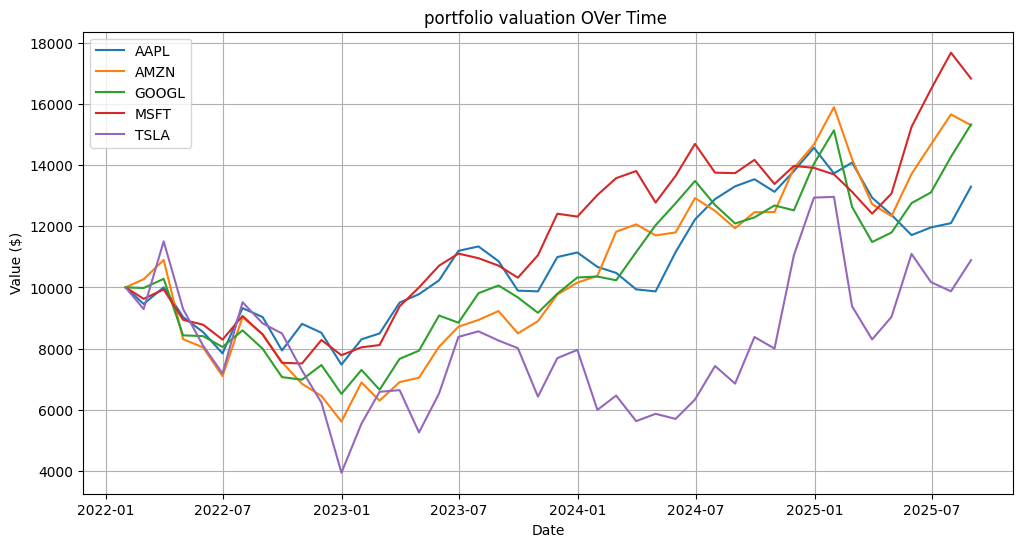

In [203]:
plt.figure(figsize=(12,6))
for stock in current_value.columns:
    plt.plot(current_value.index,current_value[stock],label=stock)

plt.title("portfolio valuation OVer Time ")
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()
plt.grid(True)
plt.show


In [204]:
current_value['tota_portfolio'] = current_value.sum(axis=1)

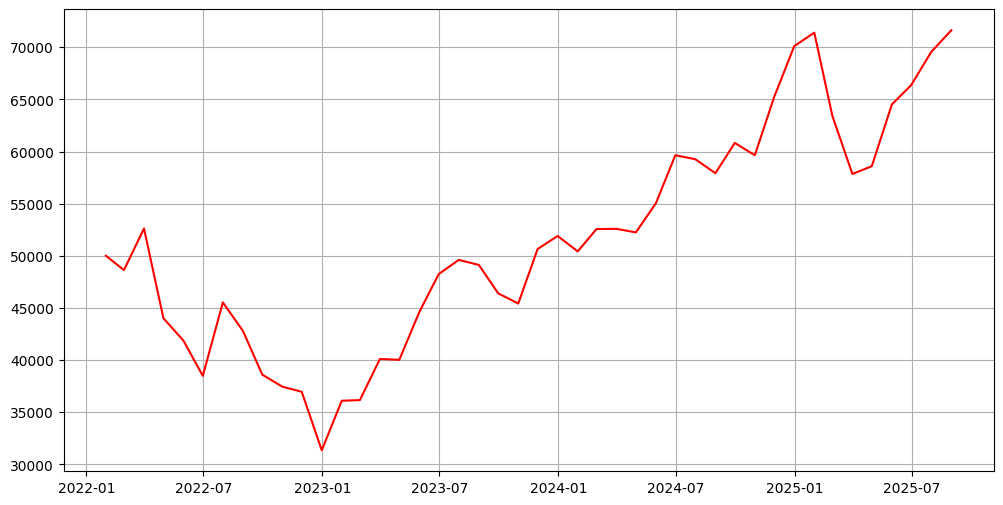

In [205]:
plt.figure(figsize=(12,6))
plt.plot(current_value.index,current_value['tota_portfolio'], label='Total Portfolio',color='red')
plt.grid(True)
